In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)

2.6.2
1.19.5


In [2]:

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
train_labels[0]

9

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
train_images[0].shape

(28, 28)

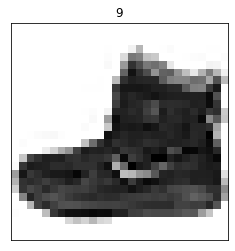

In [9]:
plt.imshow(train_images[0],cmap='gray_r')
plt.title(train_labels[0])
plt.xticks([])
plt.yticks([])
plt.show()

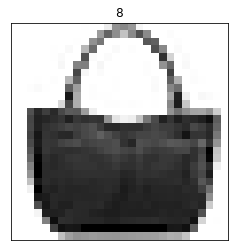

In [10]:
plt.imshow(train_images[100],cmap='gray_r')
plt.title(train_labels[100])
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
len(class_names)

10

In [14]:
class_names[1]

'Trouser'

In [15]:
class_names[8]

'Bag'

In [16]:
class_names[train_labels[100]]

'Bag'

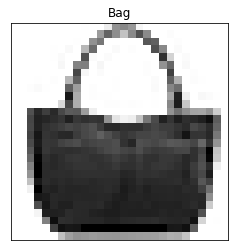

In [17]:
plt.imshow(train_images[100],cmap='gray_r')
plt.title(class_names[train_labels[100]])
plt.xticks([])
plt.yticks([])
plt.show()

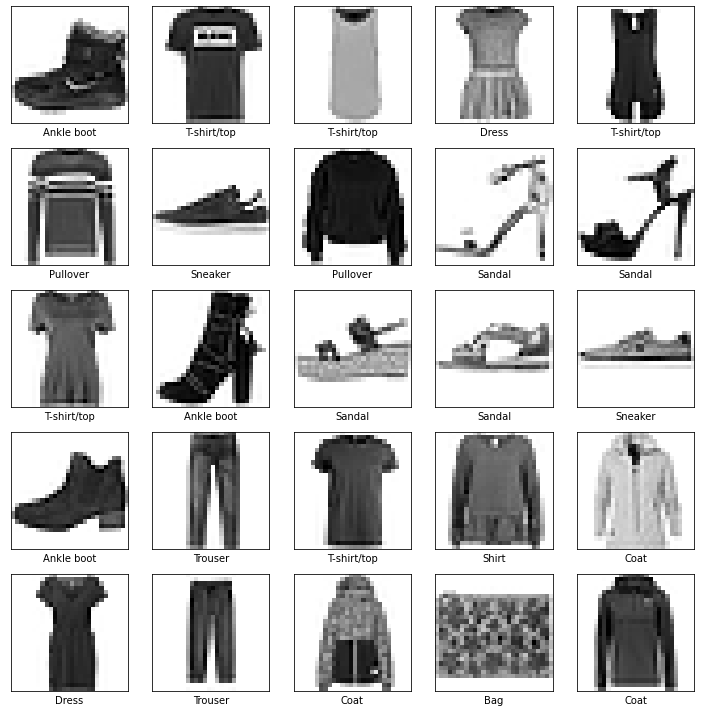

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.show()

In [19]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [20]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
history = model.fit(train_images, train_labels,validation_split=0.2, epochs=15,verbose=1)

Epoch 1/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1835 - accuracy: 0.9315 - val_loss: 0.3410 - val_accuracy: 0.8927
Epoch 2/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1737 - accuracy: 0.9349 - val_loss: 0.3596 - val_accuracy: 0.8904
Epoch 3/15
1500/1500 [==============================] - 11s 8ms/step - loss: 0.1657 - accuracy: 0.9367 - val_loss: 0.3615 - val_accuracy: 0.8867
Epoch 4/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1639 - accuracy: 0.9383 - val_loss: 0.3536 - val_accuracy: 0.8918
Epoch 5/15
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1564 - accuracy: 0.9405 - val_loss: 0.3446 - val_accuracy: 0.8938
Epoch 6/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1522 - accuracy: 0.9425 - val_loss: 0.3577 - val_accuracy: 0.8939
Epoch 7/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1480 - accuracy: 0.9449 - val_loss: 0.3713 - val_ac

In [32]:
history.history

{'loss': [0.18354223668575287,
  0.1737269014120102,
  0.16574892401695251,
  0.16392238438129425,
  0.15639808773994446,
  0.1522267907857895,
  0.14800266921520233,
  0.14421901106834412,
  0.13715778291225433,
  0.1350347250699997,
  0.13357286155223846,
  0.1279488503932953,
  0.1262640506029129,
  0.1221461296081543,
  0.12046463042497635],
 'accuracy': [0.9315000176429749,
  0.9348958134651184,
  0.9367291927337646,
  0.9382916688919067,
  0.940500020980835,
  0.9424583315849304,
  0.9448750019073486,
  0.9463124871253967,
  0.9473749995231628,
  0.9492291808128357,
  0.9496041536331177,
  0.9518333077430725,
  0.953083336353302,
  0.9541666507720947,
  0.9548541903495789],
 'val_loss': [0.3410249352455139,
  0.3595603406429291,
  0.36151498556137085,
  0.3535635471343994,
  0.3445981442928314,
  0.3577421009540558,
  0.3712581694126129,
  0.36340245604515076,
  0.37989261746406555,
  0.4027514159679413,
  0.40314847230911255,
  0.3908992111682892,
  0.3966422975063324,
  0.38163

In [33]:
history.history['accuracy']

[0.9315000176429749,
 0.9348958134651184,
 0.9367291927337646,
 0.9382916688919067,
 0.940500020980835,
 0.9424583315849304,
 0.9448750019073486,
 0.9463124871253967,
 0.9473749995231628,
 0.9492291808128357,
 0.9496041536331177,
 0.9518333077430725,
 0.953083336353302,
 0.9541666507720947,
 0.9548541903495789]

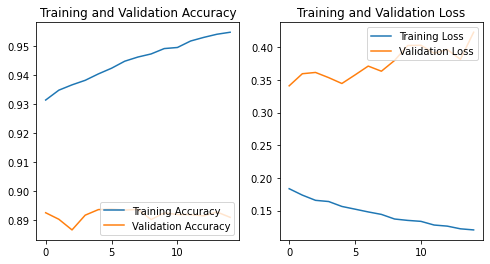

In [34]:
epochs = 15
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
# Callback

In [36]:
model_new = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10,'softmax')
])

In [38]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=6)

In [39]:
model_new.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
history = model_new.fit(train_images, train_labels, epochs=50, validation_split=0.2,callbacks=callback,verbose=1)

Epoch 1/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4924 - accuracy: 0.8257 - val_loss: 0.4738 - val_accuracy: 0.8343
Epoch 2/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3679 - accuracy: 0.8648 - val_loss: 0.3565 - val_accuracy: 0.8748
Epoch 3/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3303 - accuracy: 0.8790 - val_loss: 0.3613 - val_accuracy: 0.8690
Epoch 4/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3031 - accuracy: 0.8876 - val_loss: 0.3525 - val_accuracy: 0.8743
Epoch 5/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2827 - accuracy: 0.8940 - val_loss: 0.3186 - val_accuracy: 0.8810
Epoch 6/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2694 - accuracy: 0.8990 - val_loss: 0.3229 - val_accuracy: 0.8845
Epoch 7/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2572 - accuracy: 0.9037 - val_loss: 0.3294 - val_ac

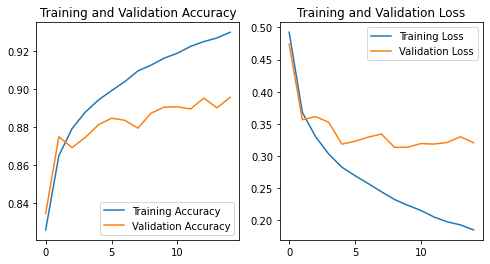

In [41]:
epochs = 15
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

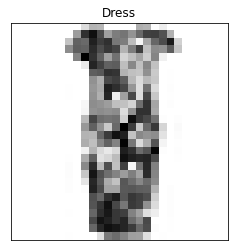

In [42]:
plt.imshow(test_images[100],cmap='gray_r')
plt.title(class_names[test_labels[100]])
plt.xticks([])
plt.yticks([])
plt.show()

In [43]:
test_images[100].shape

(28, 28)

In [44]:
test_images[100].reshape(1,28,28)

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.1372549 ,
         0.29803922, 0.28235294, 0.        , 0.        , 0.        ,
         0.        , 0.31764706, 0.29803922, 0.00784314, 0.07058824,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.38431373, 0.81176471,
         0.94117647, 0.71372549, 0.37647059, 0.50980392, 0.54117647,
         0.42352941, 0.58823529, 0.74901961, 0.75686275, 0.6745098 ,
         0.30588235, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.23137255, 0.61176471, 0.58823529,
         0.8745098 , 0.76078431, 0.80784314, 0.52941176, 0.50980392,
         0.

In [45]:
model_new.predict(test_images[100].reshape(1,28,28))

array([[3.4813934e-03, 1.1542414e-06, 1.8738432e-05, 9.9519980e-01,
        1.0076700e-05, 8.6209894e-08, 1.2628171e-03, 1.8620216e-11,
        2.5953488e-05, 1.5202930e-09]], dtype=float32)

In [46]:
model_new.predict(test_images[100].reshape(1,28,28)).round(3)

array([[0.003, 0.   , 0.   , 0.995, 0.   , 0.   , 0.001, 0.   , 0.   ,
        0.   ]], dtype=float32)

In [47]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [48]:
np.argmax(model_new.predict(test_images[100].reshape(1,28,28)),axis=1)

array([3], dtype=int64)

In [49]:
np.argmax(model_new.predict(test_images[100].reshape(1,28,28)),axis=1)[0]

3

In [50]:
class_names[np.argmax(model_new.predict(test_images[100].reshape(1,28,28)),axis=1)[0]]

'Dress'

In [ ]:
1818